In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("data/merge_data.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,0,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.0,-9.0,name
1,1,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.0,-9.0,name
2,2,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.0,-9.0,name
3,3,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.0,-9.0,name
4,4,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.0,-9.0,name


# Data preprocessing

## Assignació de categories

In [ ]:
categoriques = ['3','4','5','6','8','10','12','15','16','17','18']+[str(i) for i in range(22,27)] + ['37','38','40','50'] + [str(i) for i in range(57,68)]
for c in categoriques:
    df[int(c)]=df[int(c)].astype('category')

In [ ]:
feat_names = ["id",
 "ccf",
 "age",
 "sex",
 "painloc",
 "painexer",
 "relrest",
 "pncaden",
 "cp",
 "trestbps",
 "htn",
 "chol",
 "smoke",
 "cigs",
 "years",
 "fbs",
 "dm",
 "famhist",
 "restecg",
 "ekgmo",
 "ekgday",
 "ekgyr",
 "dig",
 "prop",
 "nitr",
 "pro",
 "diuretic",
 "proto",
 "thaldur",
 "thaltime",
 "met",
 "thalach",
 "thalrest",
 "tpeakbps",
 "tpeakbpd",
 "dummy",
 "trestbpd",
 "exang",
 "xhypo",
 "oldpeak",
 "slope",
 "rldv5",
 "rldv5e",
 "ca",
 "restckm",
 "exerckm",
 "restef",
 "restwm",
 "exeref",
 "exerwm",
 "thal",
 "thalsev",
 "thalpul",
 "earlobe",
 "cmo",
 "cday",
 "cyr",
 "num",
 "lmt",
 "ladprox",
 "laddist",
 "diag",
 "cxmain",
 "ramus",
 "om1",
 "om2",
 "rcaprox",
 "rcadist",
 "lvx1",
 "lvx2",
 "lvx3",
 "lvx4",
 "lvf",
 "cathef",
 "junk",
 "name"
]

dict_names = {i: feat_names[i] for i in range(len(feat_names))}

In [ ]:
df.rename(columns=dict_names, inplace=True)
df.columns

Index(['id', 'ccf', 'age', 'sex', 'painloc', 'painexer', 'relrest', 'pncaden',
       'cp', 'trestbps', 'htn', 'chol', 'smoke', 'cigs', 'years', 'fbs', 'dm',
       'famhist', 'restecg', 'ekgmo', 'ekgday', 'ekgyr', 'dig', 'prop', 'nitr',
       'pro', 'diuretic', 'proto', 'thaldur', 'thaltime', 'met', 'thalach',
       'thalrest', 'tpeakbps', 'tpeakbpd', 'dummy', 'trestbpd', 'exang',
       'xhypo', 'oldpeak', 'slope', 'rldv5', 'rldv5e', 'ca', 'restckm',
       'exerckm', 'restef', 'restwm', 'exeref', 'exerwm', 'thal', 'thalsev',
       'thalpul', 'earlobe', 'cmo', 'cday', 'cyr', 'num', 'lmt', 'ladprox',
       'laddist', 'diag', 'cxmain', 'ramus', 'om1', 'om2', 'rcaprox',
       'rcadist', 'lvx1', 'lvx2', 'lvx3', 'lvx4', 'lvf', 'cathef', 'junk',
       'name'],
      dtype='object')

## Feature engineering

In [ ]:
df['num'].value_counts()

0    247
1    141
3    100
2     99
4     30
Name: num, dtype: int64

Com que tenim poques dades en general i encara menys per les categories 4, i 3, i tenint en compte que 0 vol dir no tenir malaltia cardiovascular i la resta son graus de malaltia cardiovascular que no s'especifiquen, nosaltres considerarem únicament 0 o 1 (absència o presència)

In [ ]:
df['num'].replace([3,2,4], 1, inplace = True)
df['num'].value_counts()

1    370
0    247
Name: num, dtype: int64

42 rldv5: height at rest
43 rldv5e: height at peak exercise

El que ens interessa és la diferència. Ens crearem una nova feature que sigui la diferència entre les dues.

In [ ]:
df['diff_rldv5'] = df['rldv5e'] - df['rldv5']
df.drop(["rldv5e", "rldv5"], axis = 1, inplace = True)
len(df.columns)

75

## Variables indicades com a irrellevants

Eliminem les columnes indicades com a "not used", "irrelevant", dates de proves o que són l'agregació d'altres variables.

In [ ]:
print("Nombre de features abans:", len(df.columns))
useless_columns = ["id", "ccf", "dummy", "thalsev","thalpul", "earlobe", "lvx1", "lvx2", "lvx3", "lvx4", "lvf", "cathef", "junk", "name", "restckm", "exerckm", "pncaden", "cmo", "cday", "cyr", "ekgmo", "ekgday", "ekgyr"]
df.drop(useless_columns, axis = 1, inplace = True)

print("Nombre de features després:", len(df.columns))

Nombre de features abans: 75
Nombre de features després: 52


Proto és una categoria però està marcada com a float. No són consistents els valors. Convindria eliminar.

In [ ]:
df["proto"].value_counts()

df.drop("proto", axis = 1, inplace = True)

## Missing values

Tots els -9 són missing values

In [ ]:
df.replace(-9, np.nan, inplace=True)
df.head()

,age,sex,painloc,painexer,relrest,cp,trestbps,htn,chol,smoke,...,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,diff_rldv5
0,40,1,1,0,0,2,140.0,0,289.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.0
1,49,0,1,0,0,3,160.0,1,180.0,NaN,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
2,37,1,1,0,0,2,130.0,0,283.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.0
3,48,0,1,1,1,4,138.0,0,214.0,NaN,...,2,NaN,NaN,2,NaN,NaN,NaN,2,NaN,3.0
4,54,1,1,0,1,3,150.0,0,NaN,NaN,...,NaN,NaN,NaN,1,NaN,NaN,NaN,1,NaN,-4.0


Explorant les dades, hem vist que alguns missing values estaven indicats amb 0 (ex: no té sentit un colesterol de 0)

In [ ]:
df["chol"].replace(0, np.nan, inplace=True)
df["slope"].replace(0, np.nan, inplace=True)
df["trestbps"].replace(0, np.nan, inplace=True)
df["trestbpd"].replace(0, np.nan, inplace=True)

Eliminem les columnes categòriques amb més de 10% de missing values o les numèriques amb més de 20% de missing values

In [ ]:
print("Nombre de features abans:", len(df.columns))
too_nan = [c for c in df.columns if df[c].isna().sum()/len(df) > 0.1 and df[c].dtype == "category" or df[c].isna().sum()/len(df) > 0.2]
df.drop(too_nan, axis = 1, inplace = True)
print("Nombre de features després:", len(df.columns))

Nombre de features abans: 51
Nombre de features després: 22


In [ ]:
len(df)

617

In [ ]:
df.dtypes

age              int64
sex           category
painloc       category
painexer      category
relrest       category
cp            category
trestbps       float64
htn           category
restecg       category
pro           category
thaldur        float64
met            float64
thalach        float64
thalrest       float64
tpeakbps       float64
tpeakbpd       float64
trestbpd       float64
exang         category
xhypo         category
oldpeak        float64
num           category
diff_rldv5     float64
dtype: object

In [ ]:
# percentatge de NaNs
for c in df.columns:
    count = df[c].isna().sum()
    if count > 0:
          print(c, df[c].dtype, count, str(count/len(df)*100) + "%")

relrest category 4 0.6482982171799028%
trestbps float64 60 9.724473257698541%
htn category 34 5.510534846029174%
restecg category 2 0.3241491085899514%
pro category 61 9.886547811993516%
thaldur float64 56 9.076175040518638%
met float64 105 17.01782820097245%
thalach float64 55 8.914100486223662%
thalrest float64 56 9.076175040518638%
tpeakbps float64 63 10.21069692058347%
tpeakbpd float64 63 10.21069692058347%
trestbpd float64 60 9.724473257698541%
exang category 55 8.914100486223662%
xhypo category 58 9.40032414910859%
oldpeak float64 62 10.048622366288493%
diff_rldv5 float64 1 0.1620745542949757%


In [ ]:
len(df.columns)

22

## Tractament d'outliers

In [ ]:
df.xhypo.value_counts()

0    543
1     16
Name: xhypo, dtype: int64

In [ ]:
((df["met"] > 25).sum() + (df["met"] == np.nan).sum())/len(df)

0.11831442463533225

In [ ]:
df["met"].value_counts()

5.0      91
6.0      89
7.0      68
4.0      52
100.0    31
9.0      31
3.0      29
8.0      22
2.0      22
150.0    21
10.0     16
50.0     11
75.0      7
11.0      3
6.3       2
7.5       2
125.0     2
13.0      2
6.5       2
5.4       1
200.0     1
8.5       1
4.5       1
5.8       1
6.9       1
6.4       1
3.5       1
2.5       1
Name: met, dtype: int64

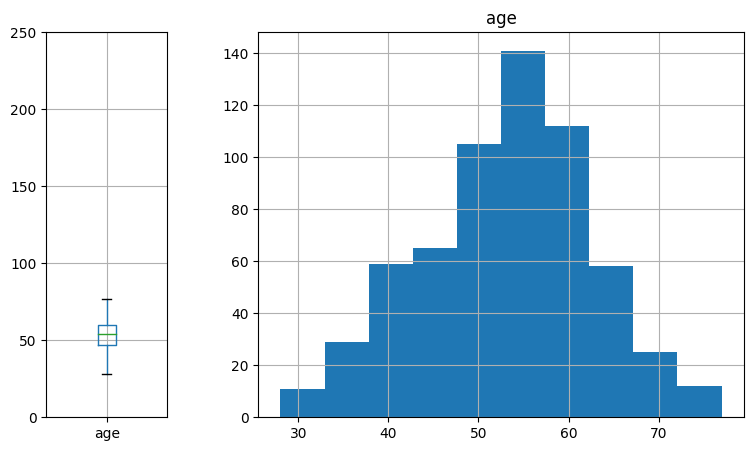

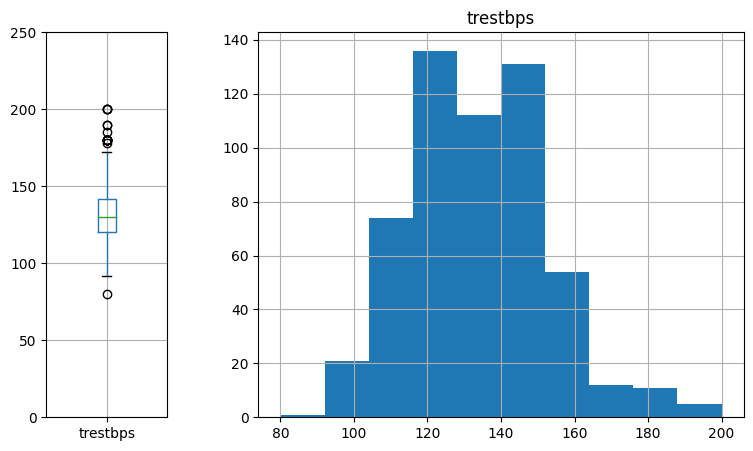

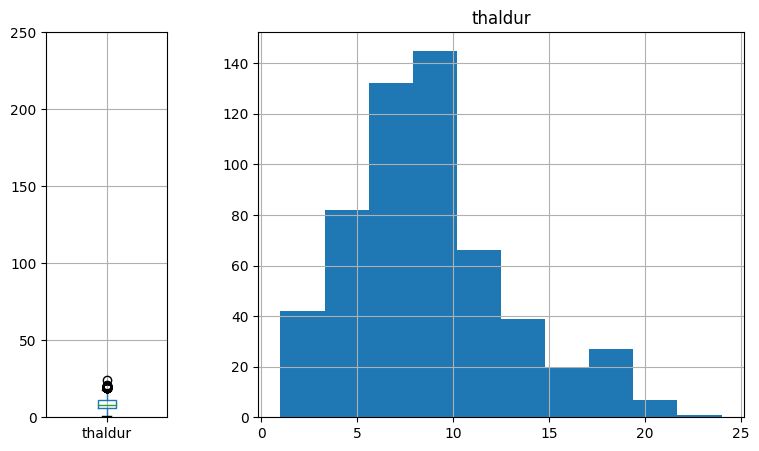

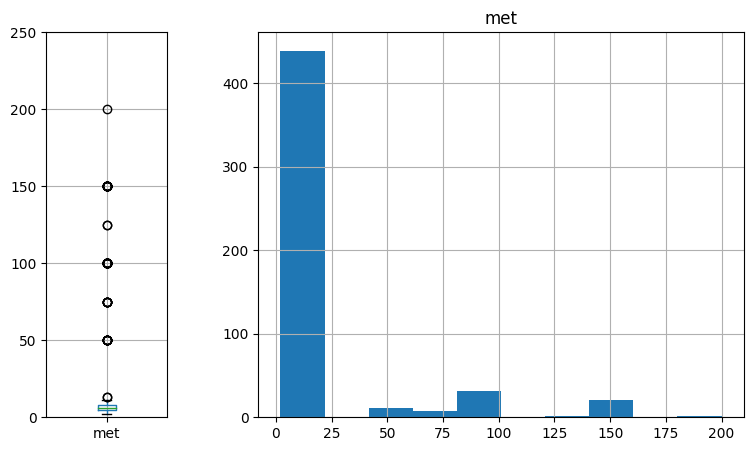

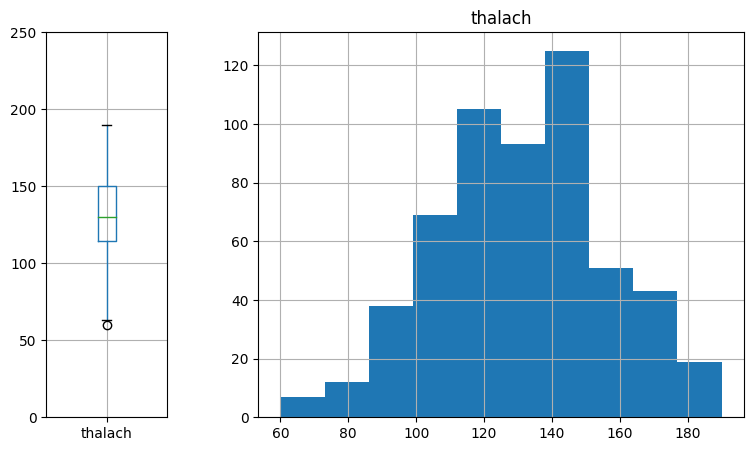

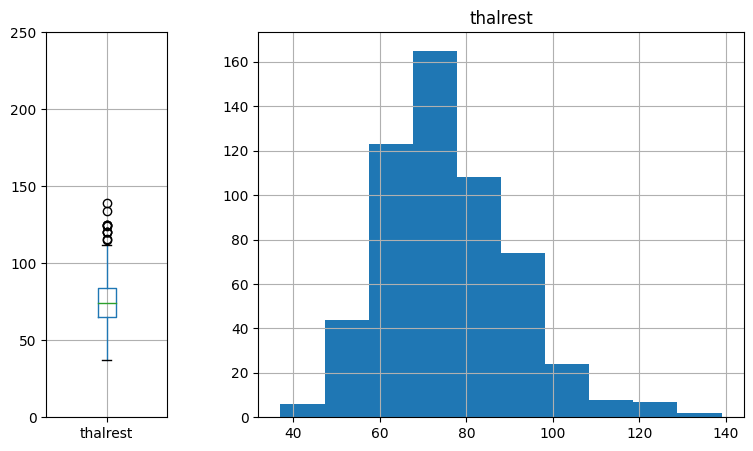

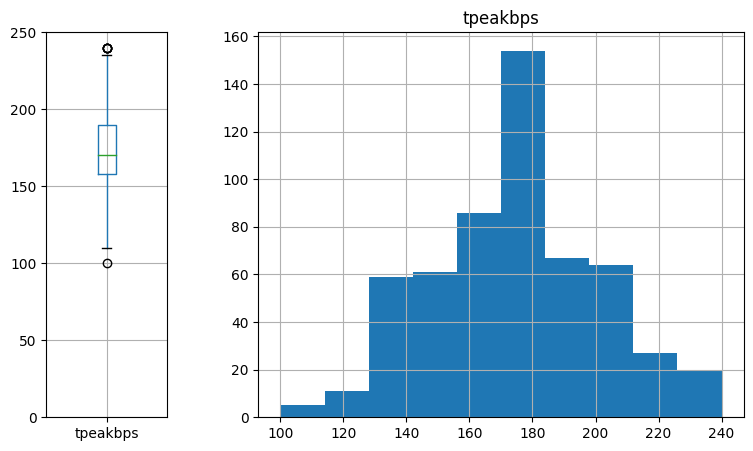

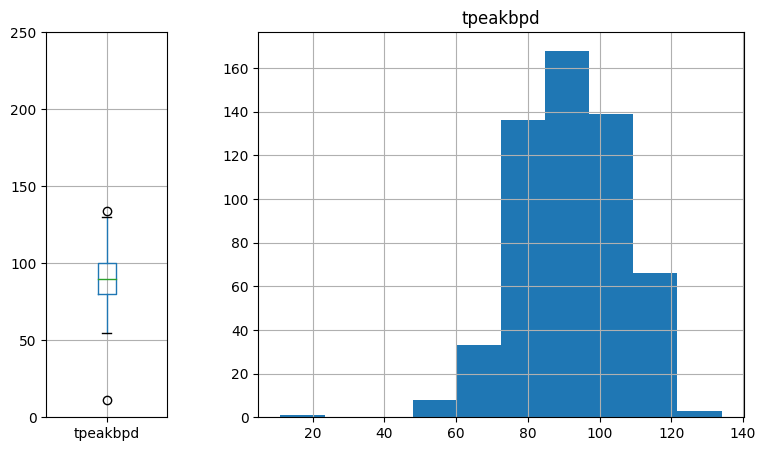

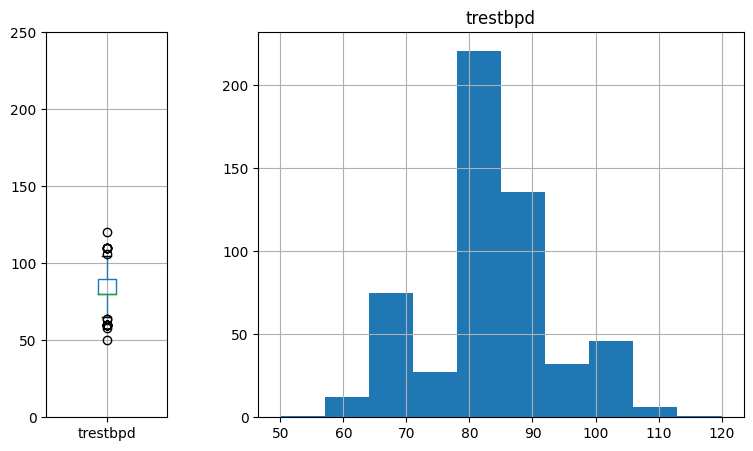

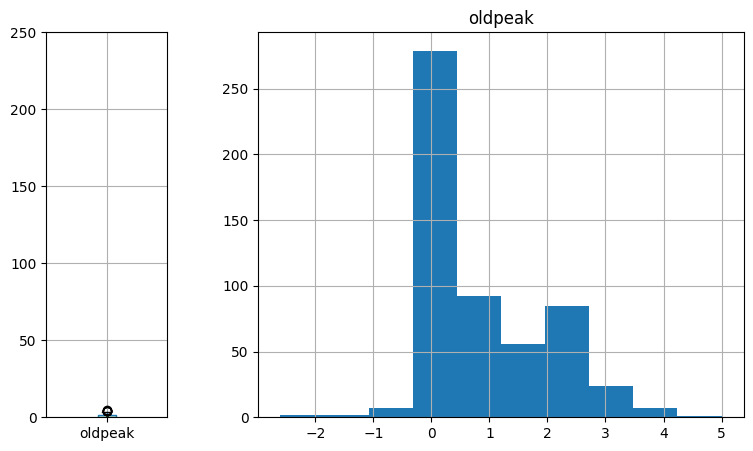

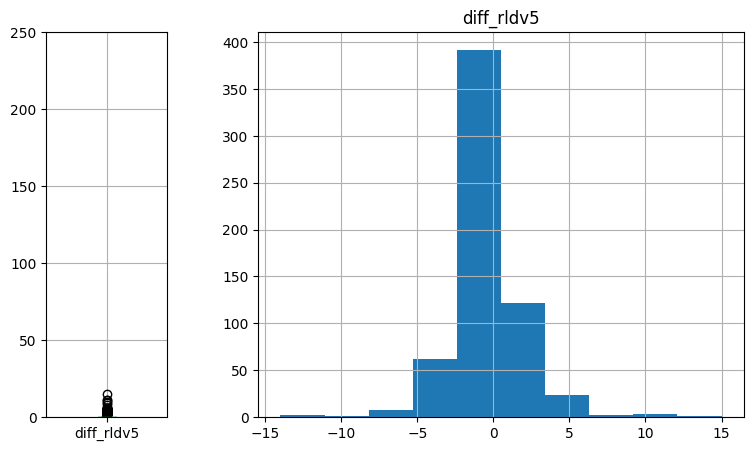

In [ ]:
for col in df.columns:
  if df[col].dtype != "category":
    fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
    df.boxplot(column=col,ax=axes[0]);
    df.hist(column=col, ax=axes[1]);
    axes[0].set_ylim((0, 250))



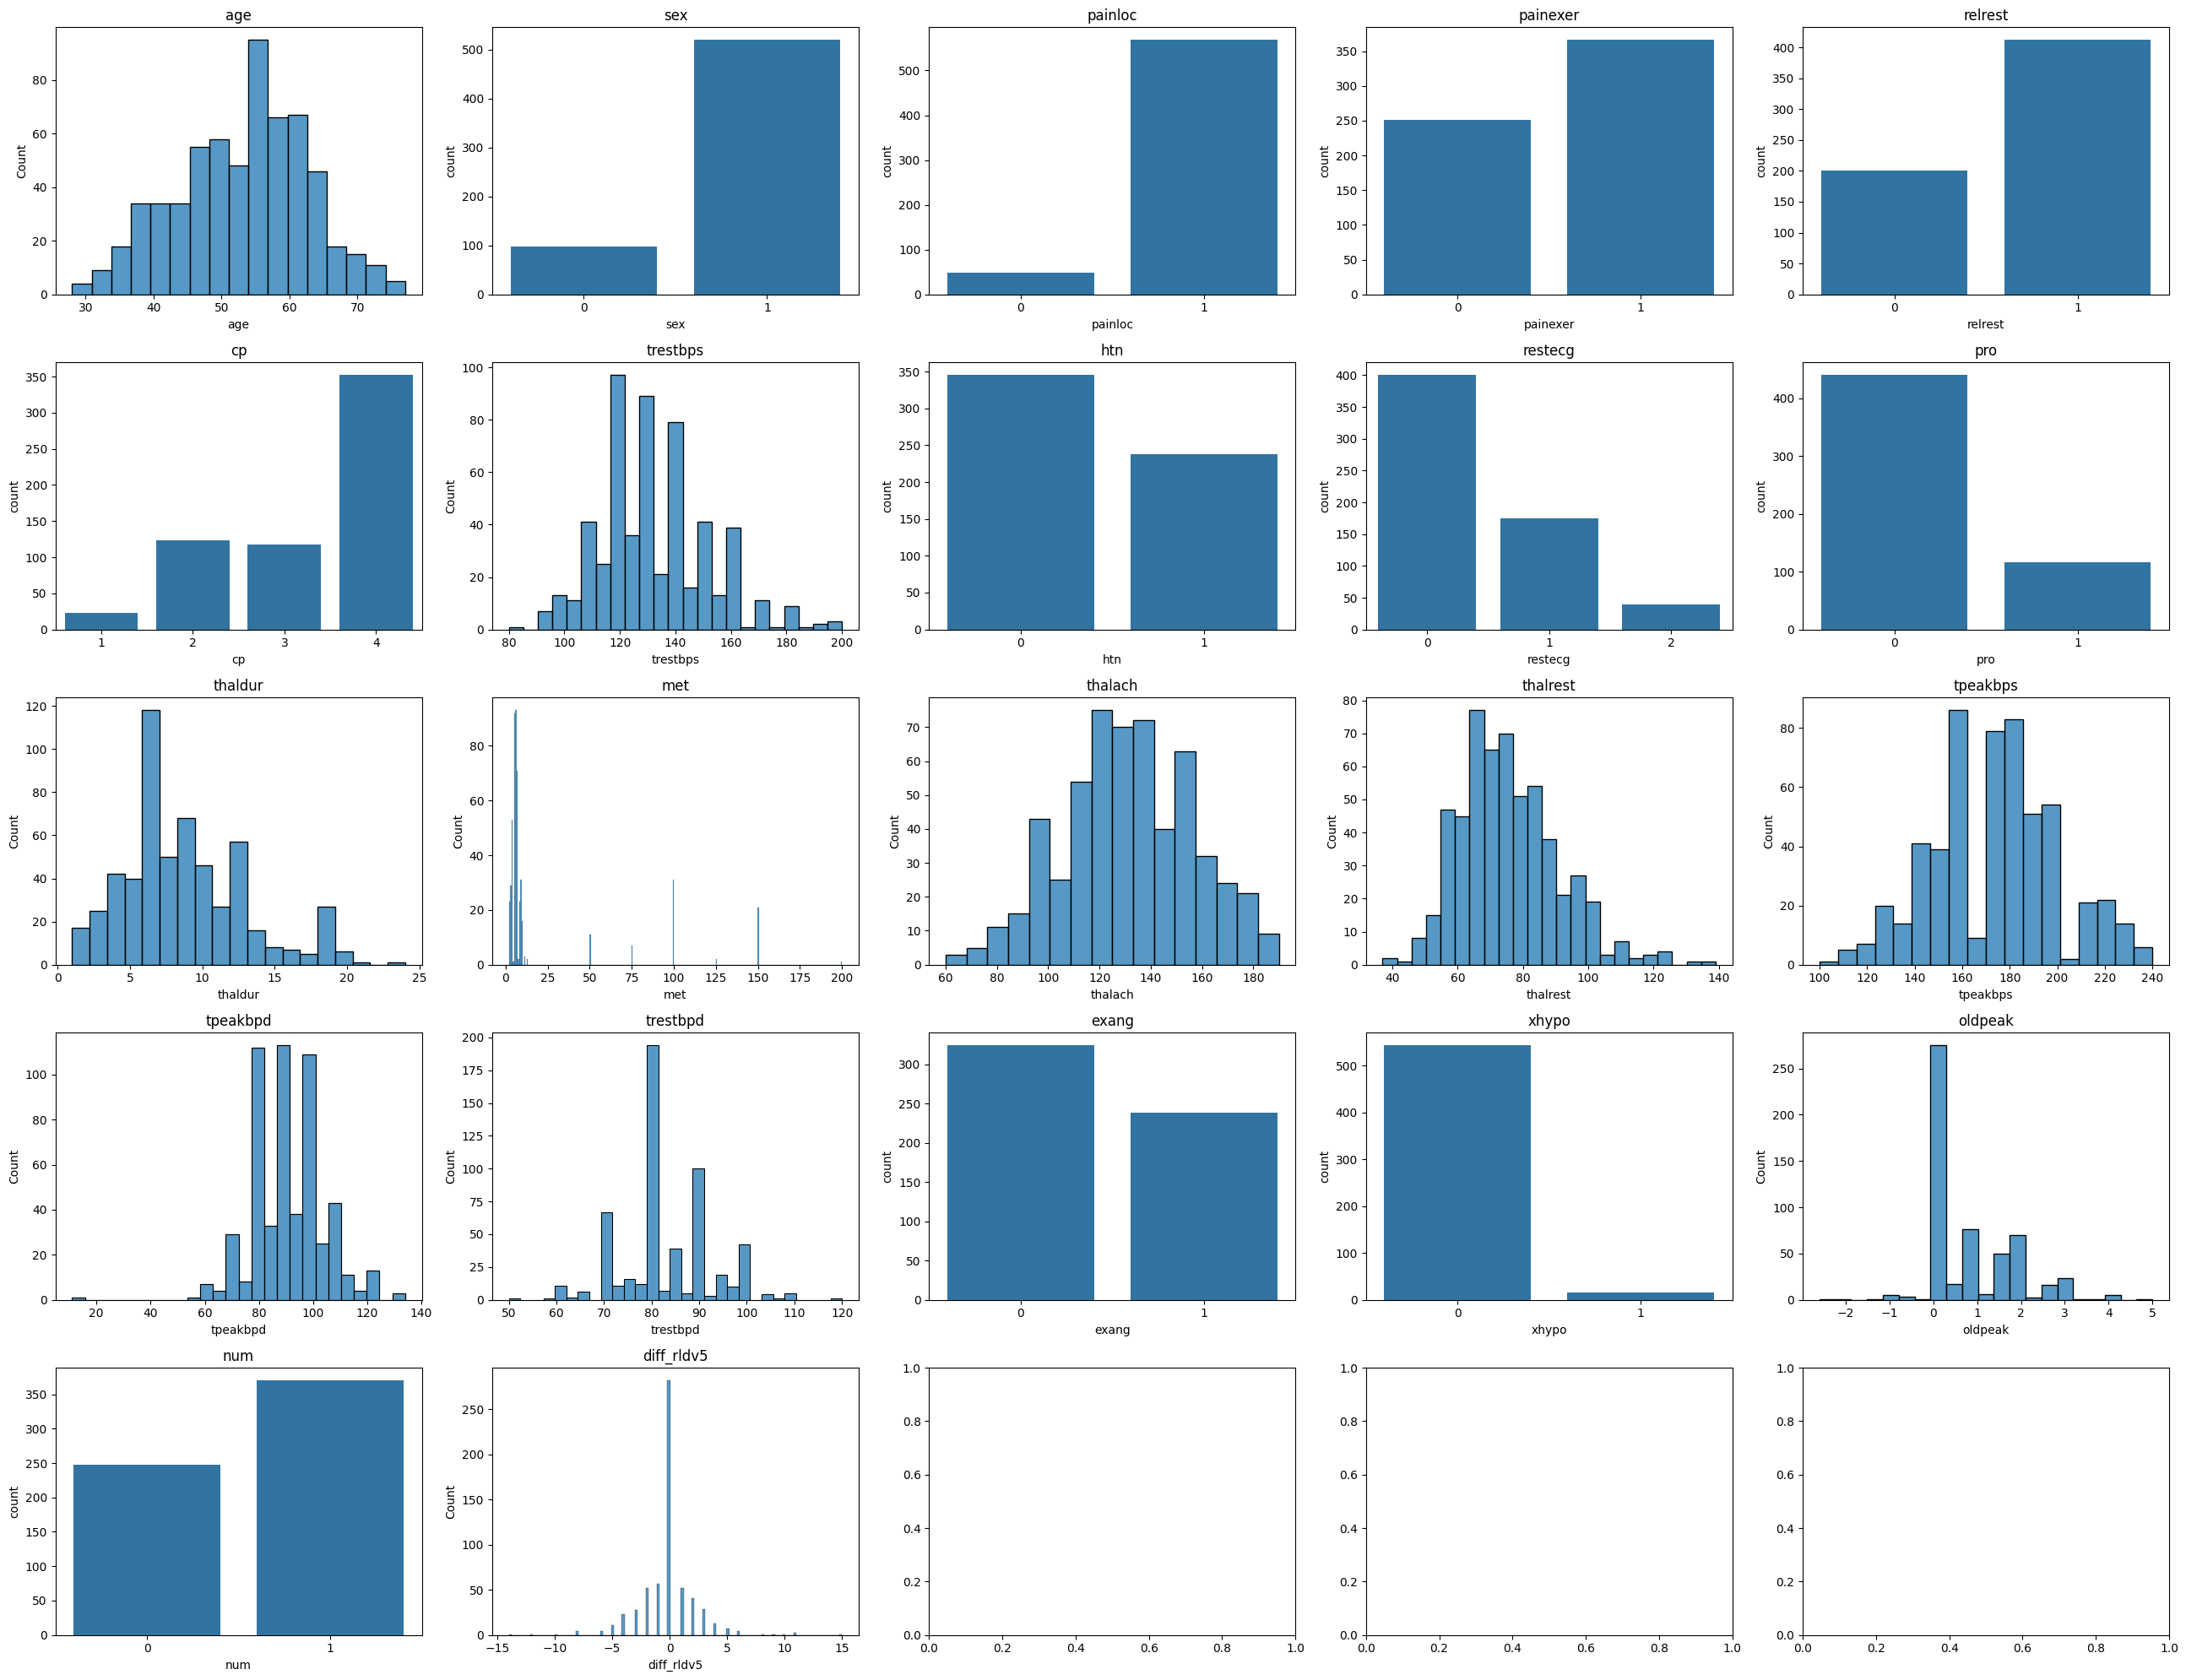

In [ ]:
fig, axes = plt.subplots(5,5,figsize=(26,20))

for i, c in enumerate(df.columns):
    ax = axes.reshape(-1)[i]
    if df[c].dtype.kind == 'O':
        a = sns.countplot(x=c,data=df,ax=ax)
    else:
        b = sns.histplot(x=c,data=df,ax=ax)
    t = ax.set_title(c)
plt.tight_layout()

- tpeakbddp deu tenir un error
- trestbpd té errors
- prop té un valor 22 únic, seria un NaN
- met té valors massa alts.


In [ ]:
df["tpeakbpd"].replace(11, np.nan, inplace=True)
df.loc[df["met"] > 25, "met"] = np.nan

In [ ]:
for c in df.columns:
    count = df[c].isna().sum()
    if count > 0:
          print(c, df[c].dtype, count, str(count/len(df)*100) + "%")

relrest category 4 0.6482982171799028%
trestbps float64 60 9.724473257698541%
htn category 34 5.510534846029174%
restecg category 2 0.3241491085899514%
pro category 61 9.886547811993516%
thaldur float64 56 9.076175040518638%
met float64 178 28.84927066450567%
thalach float64 55 8.914100486223662%
thalrest float64 56 9.076175040518638%
tpeakbps float64 63 10.21069692058347%
tpeakbpd float64 64 10.372771474878444%
trestbpd float64 60 9.724473257698541%
exang category 55 8.914100486223662%
xhypo category 58 9.40032414910859%
oldpeak float64 62 10.048622366288493%
diff_rldv5 float64 1 0.1620745542949757%


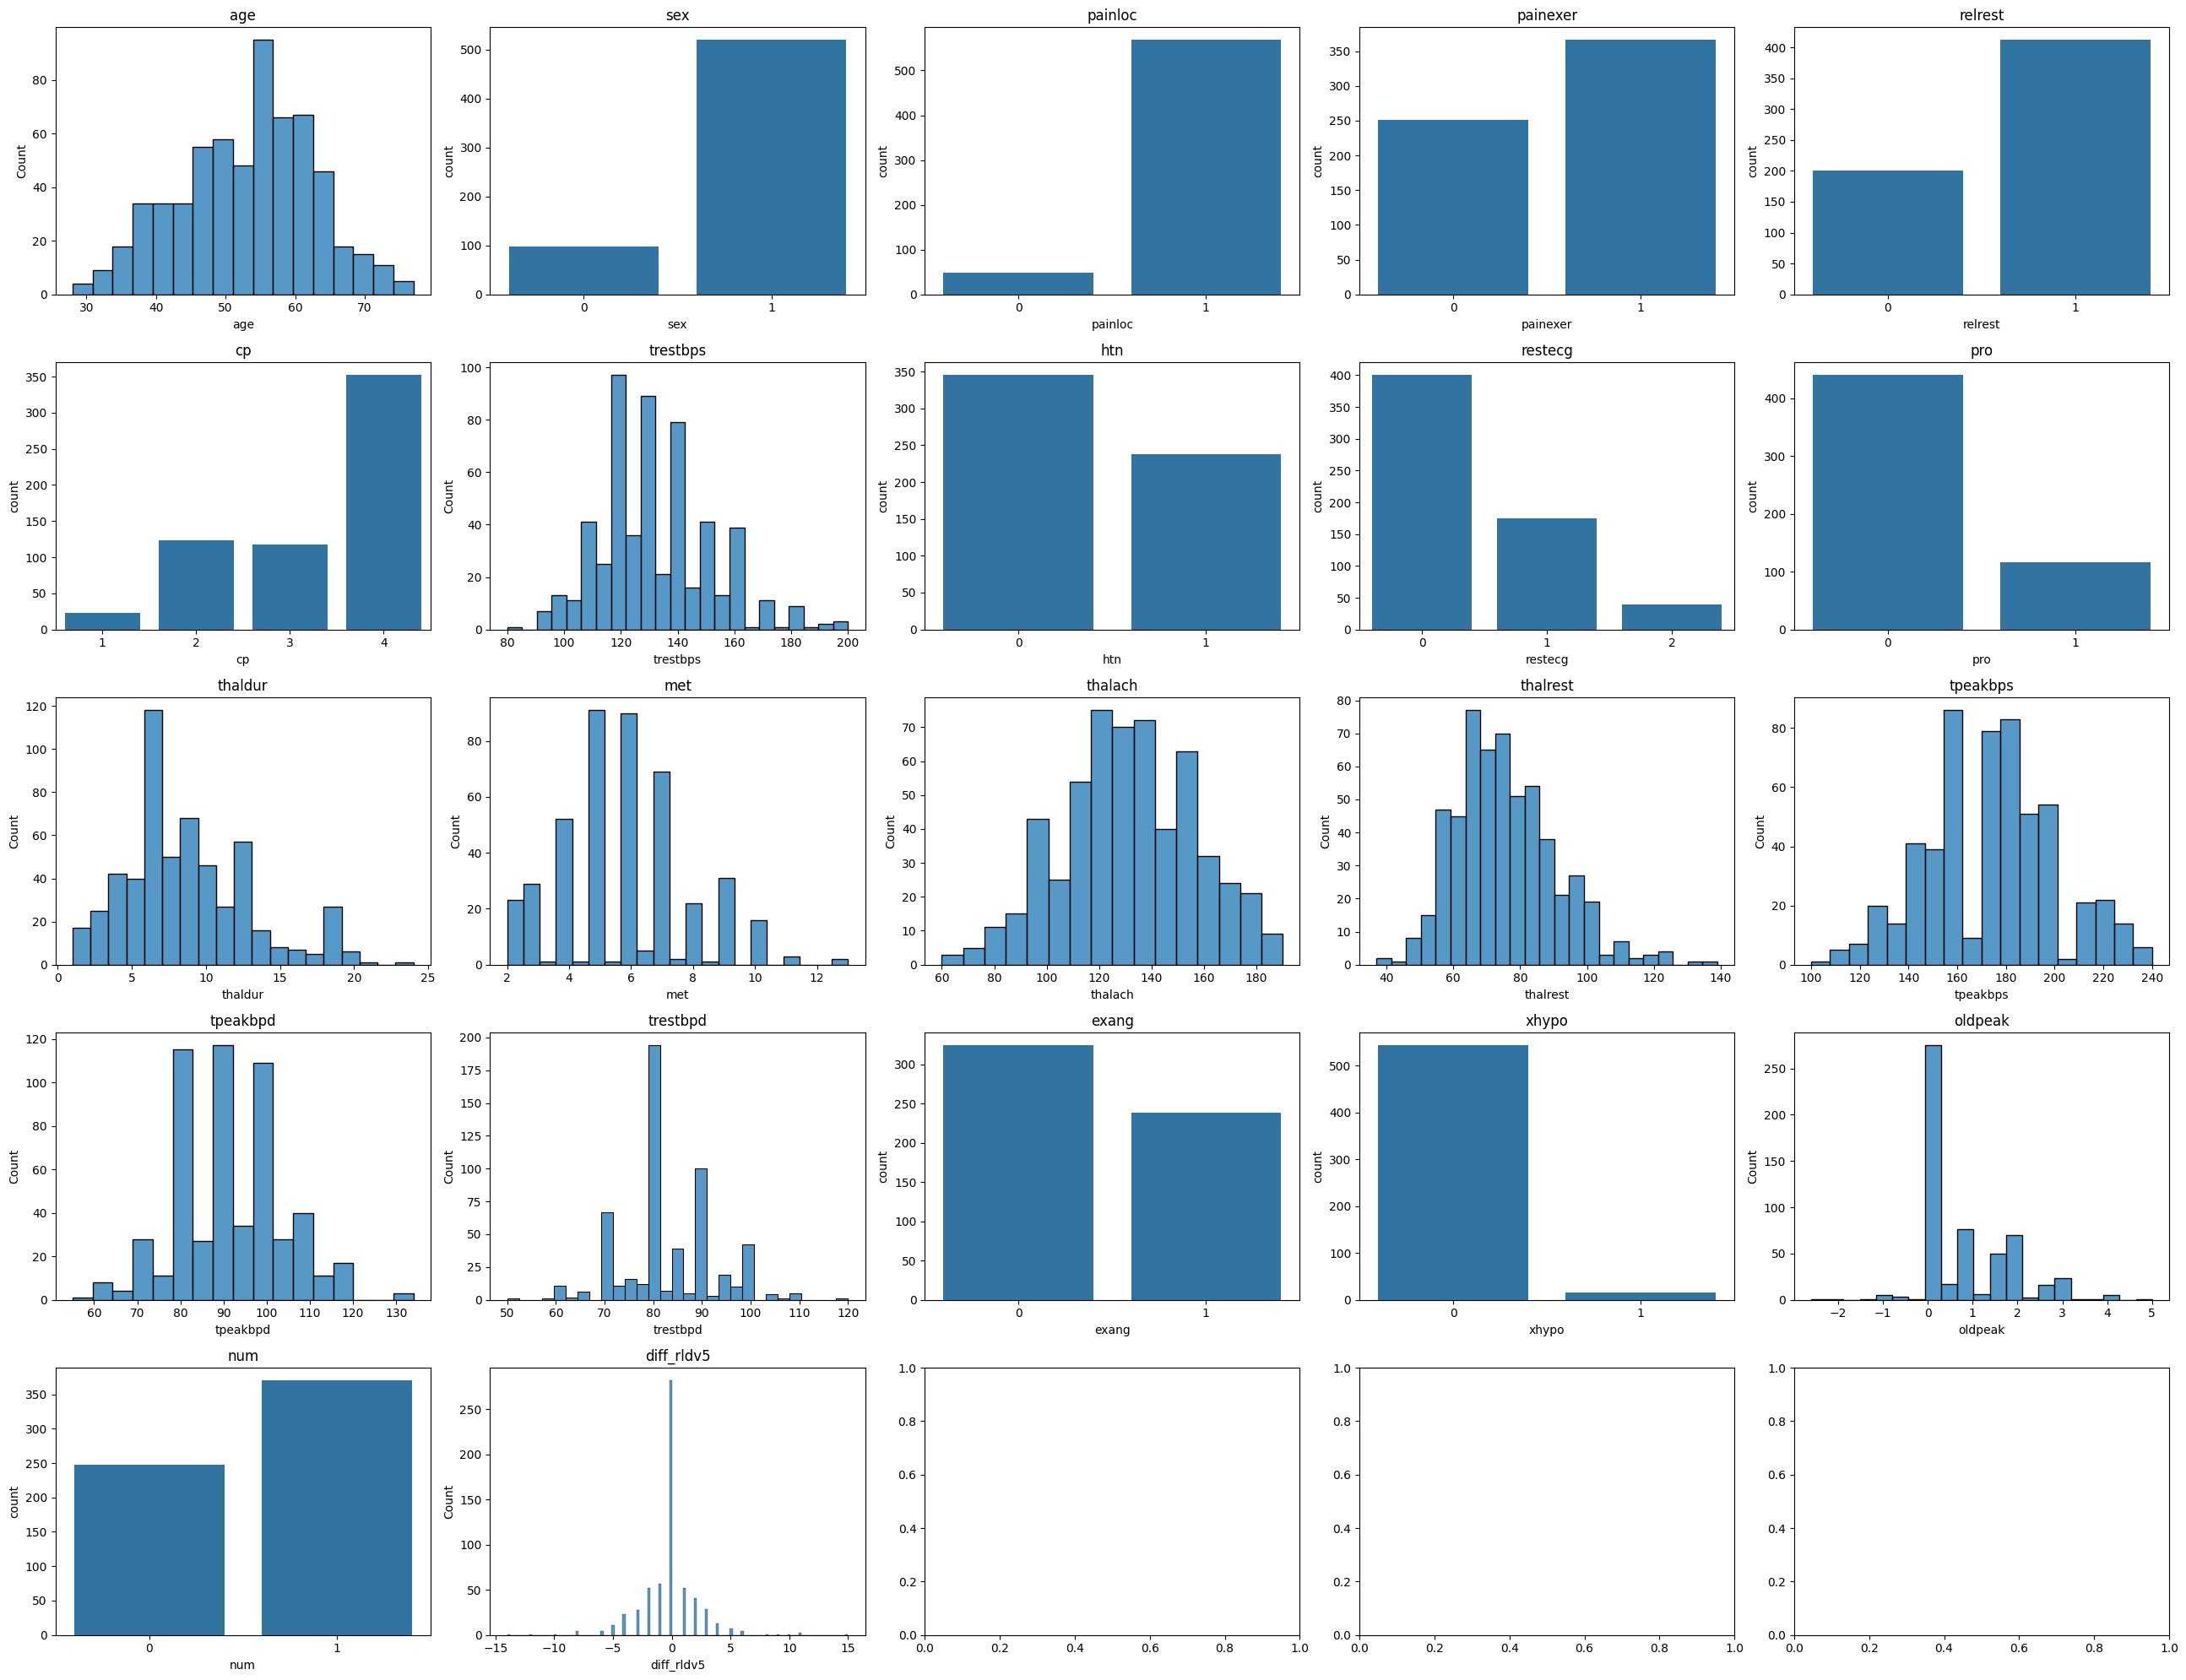

In [ ]:
fig, axes = plt.subplots(5,5,figsize=(26,20))

for i, c in enumerate(df.columns):
    ax = axes.reshape(-1)[i]
    if df[c].dtype.kind == 'O':
        a = sns.countplot(x=c,data=df,ax=ax)
    else:
        b = sns.histplot(x=c,data=df,ax=ax)
    t = ax.set_title(c)
plt.tight_layout()

In [ ]:
len(df.columns)

22

## Variables correlades

In [ ]:
df.columns

Index(['age', 'sex', 'painloc', 'painexer', 'relrest', 'cp', 'trestbps', 'htn',
       'restecg', 'pro', 'thaldur', 'met', 'thalach', 'thalrest', 'tpeakbps',
       'tpeakbpd', 'trestbpd', 'exang', 'xhypo', 'oldpeak', 'num',
       'diff_rldv5'],
      dtype='object')

In [ ]:
sns.pairplot(data=df, hue='num');

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7e7cfd02c280> (for post_execute):


KeyboardInterrupt: 

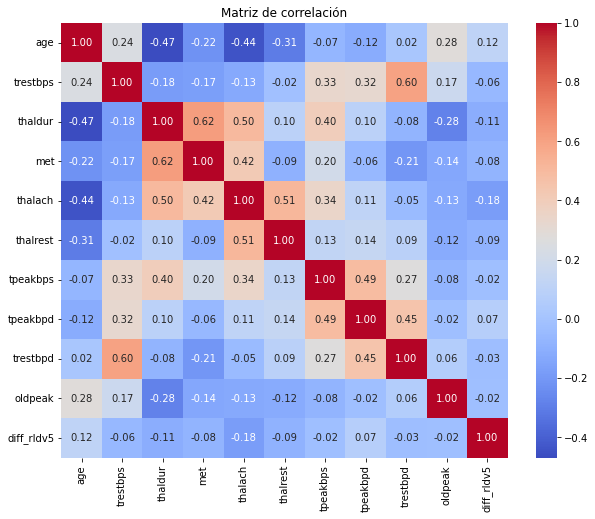

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

In [ ]:
len(df.columns)

22

In [ ]:
df.columns

Index(['age', 'sex', 'painloc', 'painexer', 'relrest', 'cp', 'trestbps', 'htn',
       'restecg', 'pro', 'thaldur', 'met', 'thalach', 'thalrest', 'tpeakbps',
       'tpeakbpd', 'trestbpd', 'exang', 'xhypo', 'oldpeak', 'num',
       'diff_rldv5'],
      dtype='object')

## Tractament de variables categòriques

In [ ]:
cat_cols = df.select_dtypes(include=['category']).columns
cat_cols

Index(['sex', 'painloc', 'painexer', 'relrest', 'cp', 'htn', 'restecg', 'pro',
       'exang', 'xhypo', 'num'],
      dtype='object')

In [ ]:
# eliminem rows amb nans
df.dropna(subset = cat_cols, inplace = True)
for col in cat_cols:
  print(df[col].isna().any())

False
False
False
False
False
False
False
False
False
False
False


In [ ]:
# one hot encoding excepte al target
cat_no_target = cat_cols.drop('num')
encoded_cat = pd.get_dummies(df[cat_no_target], columns = cat_no_target)

df = pd.concat([df, encoded_cat], axis=1)
df = df.drop(cat_no_target, axis=1)

df

,age,trestbps,thaldur,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,oldpeak,...,htn_1,restecg_0,restecg_1,restecg_2,pro_0,pro_1,exang_0,exang_1,xhypo_0,xhypo_1
0,40,140.0,18.0,7.0,172.0,86.0,200.0,110.0,86.0,0.0,...,0,1,0,0,1,0,1,0,1,0
1,49,160.0,10.0,7.0,156.0,100.0,220.0,106.0,90.0,1.0,...,1,1,0,0,1,0,1,0,1,0
2,37,130.0,10.0,5.0,98.0,58.0,180.0,100.0,80.0,0.0,...,0,0,1,0,1,0,1,0,1,0
3,48,138.0,5.0,4.0,108.0,54.0,210.0,106.0,86.0,1.5,...,0,1,0,0,1,0,0,1,1,0
4,54,150.0,2.0,3.0,122.0,74.0,130.0,100.0,90.0,0.0,...,0,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,158.0,8.0,8.0,138.0,86.0,202.0,98.0,90.0,0.0,...,1,0,1,0,1,0,0,1,1,0
611,46,134.0,5.5,7.0,126.0,88.0,174.0,114.0,90.0,0.0,...,1,1,0,0,1,0,1,0,1,0
612,54,127.0,7.5,8.0,154.0,83.0,158.0,84.0,78.0,0.0,...,0,0,1,0,1,0,1,0,1,0
614,55,122.0,5.3,5.0,100.0,74.0,210.0,100.0,70.0,0.0,...,1,0,1,0,1,0,1,0,1,0


In [ ]:
df.dtypes

age              int64
trestbps       float64
thaldur        float64
met            float64
thalach        float64
thalrest       float64
tpeakbps       float64
tpeakbpd       float64
trestbpd       float64
oldpeak        float64
num           category
diff_rldv5     float64
sex_0            uint8
sex_1            uint8
painloc_0        uint8
painloc_1        uint8
painexer_0       uint8
painexer_1       uint8
relrest_0        uint8
relrest_1        uint8
cp_1             uint8
cp_2             uint8
cp_3             uint8
cp_4             uint8
htn_0            uint8
htn_1            uint8
restecg_0        uint8
restecg_1        uint8
restecg_2        uint8
pro_0            uint8
pro_1            uint8
exang_0          uint8
exang_1          uint8
xhypo_0          uint8
xhypo_1          uint8
dtype: object

## Escalat de variables numèriques

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'num']
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(387, 34)
(387,)
(129, 34)
(129,)


In [ ]:
X_train

,age,trestbps,thaldur,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,oldpeak,...,htn_1,restecg_0,restecg_1,restecg_2,pro_0,pro_1,exang_0,exang_1,xhypo_0,xhypo_1
282,49,150.0,11.0,5.0,122.0,83.0,160.0,95.0,98.0,2.0,...,1,1,0,0,0,1,1,0,1,0
507,75,136.0,6.0,6.0,112.0,58.0,170.0,86.0,88.0,3.0,...,1,1,0,0,1,0,0,1,1,0
614,55,122.0,5.3,5.0,100.0,74.0,210.0,100.0,70.0,0.0,...,1,0,1,0,1,0,1,0,1,0
155,56,155.0,7.0,4.0,150.0,90.0,220.0,110.0,100.0,3.0,...,1,1,0,0,1,0,0,1,1,0
25,36,130.0,21.0,11.0,178.0,74.0,200.0,90.0,80.0,0.0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,52,120.0,14.0,6.0,150.0,75.0,180.0,80.0,80.0,0.0,...,0,1,0,0,1,0,1,0,1,0
107,34,150.0,18.0,7.0,168.0,98.0,200.0,60.0,90.0,0.0,...,0,0,1,0,1,0,1,0,1,0
274,55,120.0,11.0,5.0,134.0,98.0,170.0,100.0,82.0,0.0,...,0,0,0,1,1,0,1,0,1,0
493,49,130.0,10.0,10.0,145.0,75.0,180.0,100.0,90.0,3.0,...,0,0,1,0,1,0,1,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[num_cols]), columns=df[num_cols].columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test[num_cols]), columns=df[num_cols].columns)


X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)


X_train = pd.concat([X_train_scaled, X_train[encoded_cat.columns]], axis=1)
X_test = pd.concat([X_test_scaled, X_test[encoded_cat.columns]], axis=1)


X_train

,age,trestbps,thaldur,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,oldpeak,...,htn_1,restecg_0,restecg_1,restecg_2,pro_0,pro_1,exang_0,exang_1,xhypo_0,xhypo_1
0,0.416667,0.578947,0.434783,0.272727,0.476923,0.474227,0.428571,0.472973,0.800000,0.571429,...,1,1,0,0,0,1,1,0,1,0
1,0.958333,0.431579,0.217391,0.363636,0.400000,0.216495,0.500000,0.351351,0.633333,0.714286,...,1,1,0,0,1,0,0,1,1,0
2,0.541667,0.284211,0.186957,0.272727,0.307692,0.381443,0.785714,0.540541,0.333333,0.285714,...,1,0,1,0,1,0,1,0,1,0
3,0.562500,0.631579,0.260870,0.181818,0.692308,0.546392,0.857143,0.675676,0.833333,0.714286,...,1,1,0,0,1,0,0,1,1,0
4,0.145833,0.368421,0.869565,0.818182,0.907692,0.381443,0.714286,0.405405,0.500000,0.285714,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.479167,0.263158,0.565217,0.363636,0.692308,0.391753,0.571429,0.270270,0.500000,0.285714,...,0,1,0,0,1,0,1,0,1,0
383,0.104167,0.578947,0.739130,0.454545,0.830769,0.628866,0.714286,0.000000,0.666667,0.285714,...,0,0,1,0,1,0,1,0,1,0
384,0.541667,0.263158,0.434783,0.272727,0.569231,0.628866,0.500000,0.540541,0.533333,0.285714,...,0,0,0,1,1,0,1,0,1,0
385,0.416667,0.368421,0.391304,0.727273,0.653846,0.391753,0.571429,0.540541,0.666667,0.714286,...,0,0,1,0,1,0,1,0,1,0


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(387, 34)
(387,)
(129, 34)
(129,)


## Imputació de valors

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=7)


X_train_scaled = imputer.fit_transform(X_train)
X_test_scaled = imputer.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)


X_train

,age,trestbps,thaldur,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,oldpeak,...,htn_1,restecg_0,restecg_1,restecg_2,pro_0,pro_1,exang_0,exang_1,xhypo_0,xhypo_1
0,0.416667,0.578947,0.434783,0.272727,0.476923,0.474227,0.428571,0.472973,0.800000,0.571429,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.958333,0.431579,0.217391,0.363636,0.400000,0.216495,0.500000,0.351351,0.633333,0.714286,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.541667,0.284211,0.186957,0.272727,0.307692,0.381443,0.785714,0.540541,0.333333,0.285714,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.562500,0.631579,0.260870,0.181818,0.692308,0.546392,0.857143,0.675676,0.833333,0.714286,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.145833,0.368421,0.869565,0.818182,0.907692,0.381443,0.714286,0.405405,0.500000,0.285714,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.479167,0.263158,0.565217,0.363636,0.692308,0.391753,0.571429,0.270270,0.500000,0.285714,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
383,0.104167,0.578947,0.739130,0.454545,0.830769,0.628866,0.714286,0.000000,0.666667,0.285714,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
384,0.541667,0.263158,0.434783,0.272727,0.569231,0.628866,0.500000,0.540541,0.533333,0.285714,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
385,0.416667,0.368421,0.391304,0.727273,0.653846,0.391753,0.571429,0.540541,0.666667,0.714286,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


# Models plantejats

Anem a plantejar models tenint en compte que volem un classificador que utilitzi variables numèriques i categòriques i que sigui compatible amb valors NaN.

Possibles models:


1.   Regressió logística
4.   Naive Bayes classfier (laplace smoothing?)
5.   Random forest (f1-score, class_weight no cal)
6.   SVM
7.   Gradient boosting



In [ ]:
from sklearn.model_selection import train_test_split,  KFold, cross_validate, GridSearchCV
from sklearn.naive_bayes import BernoulliNB, GaussianNB, CategoricalNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC



from sklearn.metrics import confusion_matrix, \
                  classification_report, accuracy_score,  precision_score, recall_score, f1_score, make_scorer, roc_curve, auc

In [ ]:
def f1_custom_scoring(y_true, y_pred):
    return f1_score(y_true, y_pred, pos_label=1)
def recall_custom_scoring(y_true, y_pred):
    return recall_score(y_true,y_pred, pos_label=1)

# Especificar las métricas de evaluación
scoring = {'accuracy': 'accuracy',
           'f1_custom': make_scorer(f1_custom_scoring), 'rec_custom':make_scorer(recall_custom_scoring),'f1_macro':'f1_macro','precision_macro':'precision_macro', 'recall_macro':'recall_macro'}


In [ ]:
def confusion(true, pred):
    """
    Function for pretty printing confusion matrices
    """
    true.name = 'target'
    pred.name = 'predicted'
    cm = pd.crosstab(true.reset_index(drop=True), pred.reset_index(drop=True))
    cm = cm[cm.index]
    return cm

Definim les mètriques

In [ ]:
results = pd.DataFrame(index=[], columns= ['Recall class 1', 'F1 class 1','Accuracy', 'F1 Macro', 'Precision Macro', 'Recall Macro'])
importance = pd.DataFrame(index=[])

## **Regressió logística**


In [ ]:
logModel=LogisticRegression(solver='lbfgs', max_iter=10000)
logModel.fit(X_train, y_train)
y_pred = logModel.predict(X_test)
y_scores = logModel.predict_proba(X_test)[:, 1]


cross_val_results = pd.DataFrame(cross_validate(logModel , X_train, y_train, cv = 5, scoring = scoring ))
results.loc['RegLog',:] = cross_val_results[['test_rec_custom', 'test_f1_custom','test_accuracy', 'test_f1_macro','test_precision_macro','test_recall_macro']].mean().values
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy pel test:", accuracy)
# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcula el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)
results

Accuracy pel test: 0.8449612403100775


,Recall class 1,F1 class 1,Accuracy,F1 Macro,Precision Macro,Recall Macro
RegLog,0.853913,0.833819,0.801066,0.79287,0.797721,0.790593


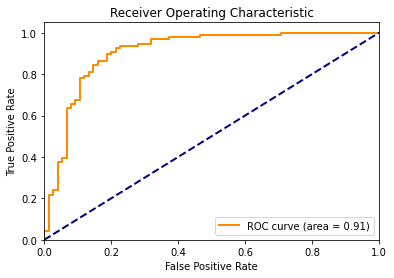

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## **Random forest**

Accuracy pel test: 0.8294573643410853
Index(['xhypo_1', 'xhypo_0', 'restecg_2', 'cp_1', 'painloc_0', 'painloc_1',
       'htn_0', 'cp_3', 'htn_1', 'restecg_0', 'restecg_1', 'pro_1', 'pro_0',
       'sex_0', 'sex_1', 'relrest_0', 'relrest_1', 'trestbpd', 'diff_rldv5',
       'cp_2', 'met', 'tpeakbps', 'trestbps', 'tpeakbpd', 'cp_4', 'painexer_0',
       'painexer_1', 'oldpeak', 'thalrest', 'exang_1', 'thalach', 'age',
       'exang_0', 'thaldur'],
      dtype='object')


,Recall class 1,F1 class 1,Accuracy,F1 Macro,Precision Macro,Recall Macro
RegLog,0.853913,0.833819,0.801066,0.79287,0.797721,0.790593
Random Forest,0.871787,0.856451,0.829604,0.822991,0.829247,0.821026
Gradient Boosting,0.871594,0.847581,0.816617,0.808205,0.81597,0.805399
SVM,0.885024,0.840204,0.803796,0.792804,0.807173,0.787493


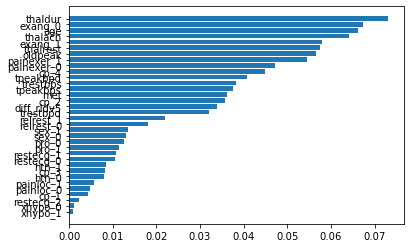

In [ ]:
clf = RandomForestClassifier(n_estimators = 300, random_state = 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


cross_val_results = pd.DataFrame(cross_validate(clf , X_train, y_train, cv = 5, scoring = scoring ))
results.loc['Random Forest',:] = cross_val_results[['test_rec_custom', 'test_f1_custom','test_accuracy', 'test_f1_macro','test_precision_macro','test_recall_macro']].mean().values
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy pel test:", accuracy)

y_scores = clf.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcula el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

importances = clf.feature_importances_
indices = np.argsort(importances)
print(X_train.columns[indices])

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])
results

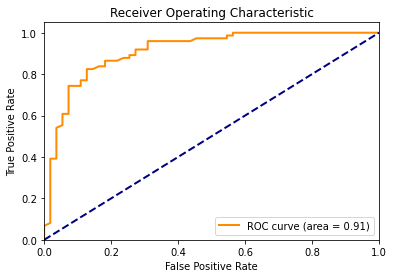

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## **Gradient boosting**

In [ ]:
param_grid = {
    'n_estimators': [100, 150, 175,200],
    'learning_rate': [0.05, 0.1, 0.15, 1, 2],
    'max_depth': [5, 6, 7],
    'subsample': [0.4, 0.5, 0.6]
}

clf_test = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=clf_test, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 175, 'subsample': 0.6}


Accuracy pel test: 0.7906976744186046
Index(['painloc_1', 'xhypo_1', 'htn_0', 'xhypo_0', 'restecg_0', 'restecg_1',
       'painloc_0', 'cp_3', 'exang_1', 'pro_0', 'relrest_1', 'sex_1',
       'restecg_2', 'painexer_1', 'trestbpd', 'relrest_0', 'met', 'pro_1',
       'htn_1', 'cp_2', 'cp_4', 'cp_1', 'trestbps', 'sex_0', 'oldpeak',
       'tpeakbps', 'diff_rldv5', 'tpeakbpd', 'thalach', 'thalrest', 'age',
       'painexer_0', 'thaldur', 'exang_0'],
      dtype='object')


,Recall class 1,F1 class 1,Accuracy,F1 Macro,Precision Macro,Recall Macro
RegLog,0.853913,0.833819,0.801066,0.79287,0.797721,0.790593
Random Forest,0.871787,0.856451,0.829604,0.822991,0.829247,0.821026
Gradient Boosting,0.871594,0.847581,0.816617,0.808205,0.81597,0.805399
SVM,0.885024,0.840204,0.803796,0.792804,0.807173,0.787493
RFE RF,0.889372,0.862732,0.834699,0.827257,0.834601,0.823474
RFE LOG,0.867246,0.843217,0.811422,0.803197,0.809222,0.800385
RFE SVM,0.85401,0.841427,0.811522,0.804426,0.807445,0.803141
RFE GB,0.871594,0.847581,0.816617,0.808205,0.81597,0.805399


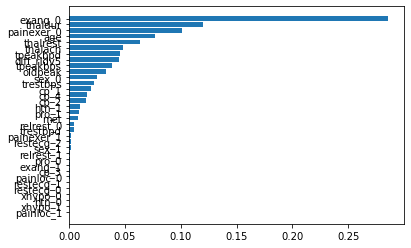

In [ ]:
clf = GradientBoostingClassifier(n_estimators=160, random_state=42, learning_rate = 1, max_depth = 5)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cross_val_results = pd.DataFrame(cross_validate(clf, X_train, y_train, cv = 5, scoring = scoring ))
results.loc['Gradient Boosting',:] = cross_val_results[['test_rec_custom', 'test_f1_custom','test_accuracy', 'test_f1_macro','test_precision_macro','test_recall_macro']].mean().values
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy pel test:", accuracy)

y_scores = clf.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcula el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

importances = clf.feature_importances_
indices = np.argsort(importances)
print(X_train.columns[indices])
fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])
results



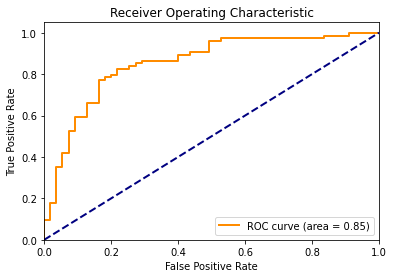

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## **SVM**

In [ ]:
param = {
    'C': [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],
    'degree': [2, 3, 4, 5]
}
# Call the function for hyperparameter tuning
model = SVC()
clf = GridSearchCV(model, param, cv=5)
clf.fit(X_train, y_train)

print('Best params:', clf.best_params_)


Best params: {'C': 10, 'degree': 2, 'gamma': 0.5, 'kernel': 'rbf'}


In [ ]:
svm = SVC(kernel='poly', degree=2, gamma='scale', C = 0.1, random_state = 42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

y_scores = svm.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

cross_val_results = pd.DataFrame(cross_validate(svm , X_train, y_train, cv = 5, scoring = scoring ))
results.loc['SVM',:] = cross_val_results[['test_rec_custom', 'test_f1_custom','test_accuracy', 'test_f1_macro','test_precision_macro','test_recall_macro']].mean().values
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy pel test:", accuracy)
results

Accuracy pel test: 0.8449612403100775


,Recall class 1,F1 class 1,Accuracy,F1 Macro,Precision Macro,Recall Macro
RegLog,0.853913,0.833819,0.801066,0.79287,0.797721,0.790593
Random Forest,0.858551,0.84515,0.81675,0.810071,0.814469,0.808253
Gradient Boosting,0.871594,0.847581,0.816617,0.808205,0.81597,0.805399
SVM,0.885024,0.840204,0.803796,0.792804,0.807173,0.787493


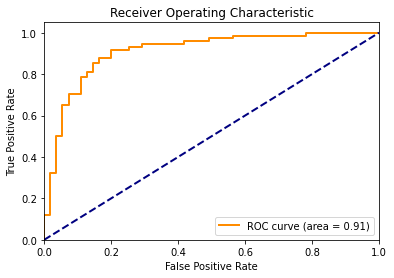

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Feature reduction

A continuació intentarem eliminar variables dels models per intentar millorar les mètriques i reduir l'overfitting:

## **Random forest**

Trobem que 15 variables dona el millor resultat

In [ ]:
from sklearn.feature_selection import RFE

rf = RandomForestClassifier(n_estimators = 300, random_state = 42)

# Crear el objeto RFE y seleccionar 5 características
selector = RFE(estimator=rf, n_features_to_select=15, step=1)  # 'step' determina cuántas características eliminar en cada iteración
selector = selector.fit(X_train, y_train)

cross_val_results = pd.DataFrame(cross_validate(selector , X_train, y_train, cv = 5, scoring = scoring ))
results.loc['RFE RF',:] = cross_val_results[['test_rec_custom', 'test_f1_custom','test_accuracy', 'test_f1_macro','test_precision_macro','test_recall_macro']].mean().values
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy pel test:", accuracy)

y_scores = selector.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcula el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)


results

Accuracy pel test: 0.7906976744186046


,Recall class 1,F1 class 1,Accuracy,F1 Macro,Precision Macro,Recall Macro
RegLog,0.853913,0.833819,0.801066,0.79287,0.797721,0.790593
Random Forest,0.871787,0.856451,0.829604,0.822991,0.829247,0.821026
Gradient Boosting,0.871594,0.847581,0.816617,0.808205,0.81597,0.805399
SVM,0.885024,0.840204,0.803796,0.792804,0.807173,0.787493
RFE RF,0.889372,0.862732,0.834699,0.827257,0.834601,0.823474


## **Regressió logística**


In [ ]:
logModel=LogisticRegression(solver='lbfgs', max_iter=10000)

selector = RFE(estimator=logModel, n_features_to_select=15, step=1)
selector = selector.fit(X_train, y_train)

cross_val_results = pd.DataFrame(cross_validate(selector , X_train, y_train, cv = 5, scoring = scoring ))
results.loc['RFE LOG',:] = cross_val_results[['test_rec_custom', 'test_f1_custom','test_accuracy', 'test_f1_macro','test_precision_macro','test_recall_macro']].mean().values
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy pel test:", accuracy)
# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcula el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)
results

Accuracy pel test: 0.7906976744186046


,Recall class 1,F1 class 1,Accuracy,F1 Macro,Precision Macro,Recall Macro
RegLog,0.853913,0.833819,0.801066,0.79287,0.797721,0.790593
Random Forest,0.871787,0.856451,0.829604,0.822991,0.829247,0.821026
Gradient Boosting,0.871594,0.847581,0.816617,0.808205,0.81597,0.805399
SVM,0.885024,0.840204,0.803796,0.792804,0.807173,0.787493
RFE RF,0.889372,0.862732,0.834699,0.827257,0.834601,0.823474
RFE LOG,0.867246,0.843217,0.811422,0.803197,0.809222,0.800385


## SVM

Cal que el kernel sigui lineal per fer RFE, podem reduir el nombre de variables i utilitzar un kernel lineal sense perdre precisió

In [ ]:
svm = SVC(kernel='linear', random_state = 42)

selector = RFE(estimator=svm, n_features_to_select=22, step=1)
selector = selector.fit(X_train, y_train)

cross_val_results = pd.DataFrame(cross_validate(selector , X_train, y_train, cv = 5, scoring = scoring ))
results.loc['RFE SVM',:] = cross_val_results[['test_rec_custom', 'test_f1_custom','test_accuracy', 'test_f1_macro','test_precision_macro','test_recall_macro']].mean().values
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy pel test:", accuracy)
results

Accuracy pel test: 0.7906976744186046


,Recall class 1,F1 class 1,Accuracy,F1 Macro,Precision Macro,Recall Macro
RegLog,0.853913,0.833819,0.801066,0.79287,0.797721,0.790593
Random Forest,0.871787,0.856451,0.829604,0.822991,0.829247,0.821026
Gradient Boosting,0.871594,0.847581,0.816617,0.808205,0.81597,0.805399
SVM,0.885024,0.840204,0.803796,0.792804,0.807173,0.787493
RFE RF,0.889372,0.862732,0.834699,0.827257,0.834601,0.823474
RFE LOG,0.867246,0.843217,0.811422,0.803197,0.809222,0.800385
RFE SVM,0.85401,0.841427,0.811522,0.804426,0.807445,0.803141


## Gradient boosting

No millora treient paràmetres

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42, learning_rate = 1, max_depth = 5)

# Crear el objeto RFE y seleccionar 5 características
selector = RFE(estimator=gb, n_features_to_select=34, step=1)  # 'step' determina cuántas características eliminar en cada iteración
selector = selector.fit(X_train, y_train)

cross_val_results = pd.DataFrame(cross_validate(selector, X_train, y_train, cv = 5, scoring = scoring ))
results.loc['RFE GB',:] = cross_val_results[['test_rec_custom', 'test_f1_custom','test_accuracy', 'test_f1_macro','test_precision_macro','test_recall_macro']].mean().values
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy pel test:", accuracy)

y_scores = selector.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcula el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

results

Accuracy pel test: 0.7906976744186046


,Recall class 1,F1 class 1,Accuracy,F1 Macro,Precision Macro,Recall Macro
RegLog,0.853913,0.833819,0.801066,0.79287,0.797721,0.790593
Random Forest,0.871787,0.856451,0.829604,0.822991,0.829247,0.821026
Gradient Boosting,0.871594,0.847581,0.816617,0.808205,0.81597,0.805399
SVM,0.885024,0.840204,0.803796,0.792804,0.807173,0.787493
RFE RF,0.889372,0.862732,0.834699,0.827257,0.834601,0.823474
RFE LOG,0.867246,0.843217,0.811422,0.803197,0.809222,0.800385
RFE SVM,0.85401,0.841427,0.811522,0.804426,0.807445,0.803141
RFE GB,0.871594,0.847581,0.816617,0.808205,0.81597,0.805399


Complete attribute documentation:
      
      0 id: patient identification number
      1 ccf: social security number (I replaced this with a dummy value of 0)
      2 age: age in years
      3 sex: sex (1 = male; 0 = female)
      4 painloc: chest pain location (1 = substernal; 0 = otherwise)
      5 painexer (1 = provoked by exertion; 0 = otherwise)
      6 relrest (1 = relieved after rest; 0 = otherwise)
      7 pncaden (sum of 5, 6, and 7)
      8 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
     9 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
     10 htn
     11 chol: serum cholestoral in mg/dl
     12 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
     13 cigs (cigarettes per day)
     14 years (number of years as a smoker)
     15 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
     16 dm (1 = history of diabetes; 0 = no such history)
     17 famhist: family history of coronary artery disease (1 = yes; 0 = no)
     18 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
     19 ekgmo (month of exercise ECG reading)
     20 ekgday(day of exercise ECG reading)
     21 ekgyr (year of exercise ECG reading)
     22 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
     23 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
     24 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
     25 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
     26 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
     27 proto: exercise protocol
          1 = Bruce     
          2 = Kottus
          3 = McHenry
          4 = fast Balke
          5 = Balke
          6 = Noughton
          7 = bike 150 kpa min/min  (Not sure if "kpa min/min" is what was written!)
          8 = bike 125 kpa min/min  
          9 = bike 100 kpa min/min
         10 = bike 75 kpa min/min
         11 = bike 50 kpa min/min
         12 = arm ergometer
     28 thaldur: duration of exercise test in minutes
     29 thaltime: time when ST measure depression was noted
     30 met: mets achieved
     31 thalach: maximum heart rate achieved
     32 thalrest: resting heart rate
     33 tpeakbps: peak exercise blood pressure (first of 2 parts)
     34 tpeakbpd: peak exercise blood pressure (second of 2 parts)
     35 dummy
     36 trestbpd: resting blood pressure
     37 exang: exercise induced angina (1 = yes; 0 = no)
     38 xhypo: (1 = yes; 0 = no)
     39 oldpeak = ST depression induced by exercise relative to rest
     40 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
     41 rldv5: height at rest
     42 rldv5e: height at peak exercise
     43 ca: number of major vessels (0-3) colored by flourosopy
     44 restckm: irrelevant
     45 exerckm: irrelevant
     46 restef: rest raidonuclid (sp?) ejection fraction
     47 restwm: rest wall (sp?) motion abnormality
        0 = none
        1 = mild or moderate
        2 = moderate or severe
        3 = akinesis or dyskmem (sp?)
     48 exeref: exercise radinalid (sp?) ejection fraction
     49 exerwm: exercise wall (sp?) motion
     50 thal: A blood disorder called thalassemia 3 = normal; 6 = fixed defect; 7 = reversable defect
     51 thalsev: not used
     52 thalpul: not used
     53 earlobe: not used
     54 cmo: month of cardiac cath (sp?)  (perhaps "call")
     55 cday: day of cardiac cath (sp?)
     56 cyr: year of cardiac cath (sp?)
     57 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)
     58 lmt
     59 ladprox
     60 laddist
     61 diag
     62 cxmain
     63 ramus
     64 om1
     65 om2
     66 rcaprox
     67 rcadist
     68 lvx1: not used
     69 lvx2: not used
     70 lvx3: not used
     71 lvx4: not used
     72 lvf: not used
     73 cathef: not used
     74 junk: not used
     75 name: last name of patient